In [1]:
from PIL import Image
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
path_to_dataset = '../data/dataset/'
train_images_folder = os.path.join(path_to_dataset, 'train_images')
train_table_path = os.path.join(path_to_dataset, 'train.csv')

In [3]:
train_table = pd.read_csv(train_table_path).fillna(-1)

In [4]:
train_table.head(15)

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,-1
2,0002cc93b.jpg_3,-1
3,0002cc93b.jpg_4,-1
4,00031f466.jpg_1,-1
5,00031f466.jpg_2,-1
6,00031f466.jpg_3,-1
7,00031f466.jpg_4,-1
8,000418bfc.jpg_1,-1
9,000418bfc.jpg_2,-1


In [5]:
def rle2mask(rle, height, width):    
    mask = np.zeros( width*height ).astype(np.uint8)
    
    if rle == -1:
        return mask.reshape(width, height).T
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 255
        current_position += lengths[index]
        
    return mask.reshape(width, height).T

In [6]:
channels_data = {}
for img_id_class, data in train_table.values:
    img_id, channel_class = img_id_class.split('_')
    
    if img_id not in channels_data.keys():
        channels_data[img_id] = {}
    
    channels_data[img_id][int(channel_class)] = data

In [10]:
images_names_list = list(set(map(lambda x: x.split('_')[0], train_table.values[:, 0])))
i = 6
images_names_list[i], channels_data[images_names_list[i]]

('d3ef4bac1.jpg',
 {1: -1,
  2: '378504 6 378756 18 379008 29 379260 40 379512 52 379766 61 380022 68 380278 76 380534 83 380790 91 381046 98 381302 105 381558 113 381814 120 382070 127 382326 135 382582 139 382838 139 383094 139 383353 136 383614 131 383875 125 384136 120 384398 114 384659 109 384920 104 385181 99 385442 94 385710 82 385984 63 386258 45 386532 27 386806 9',
  3: -1,
  4: -1})

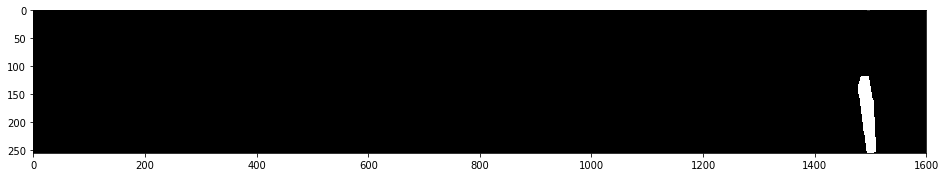

In [12]:
plt.figure(figsize=(16, 10))
plt.imshow(rle2mask(channels_data[images_names_list[i]][2], 256, 1600), 'gray')
plt.show()

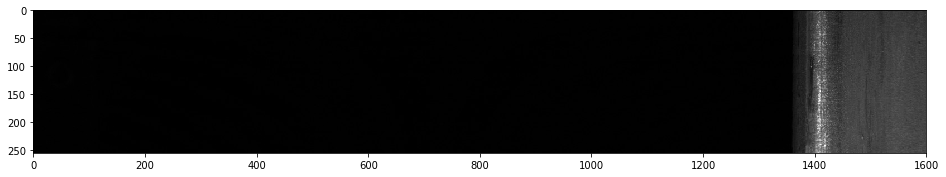

In [13]:
plt.figure(figsize=(16, 10))
plt.imshow(
    cv2.imread(os.path.join(train_images_folder, images_names_list[i]), 0),
    'gray'
)
plt.show()

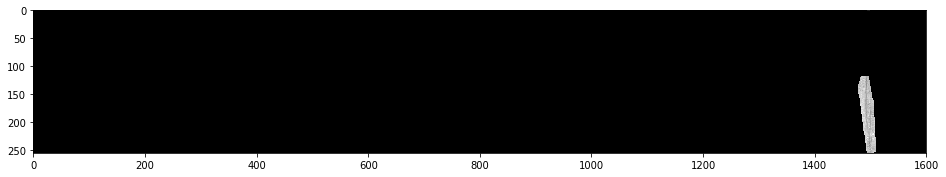

In [15]:
plt.figure(figsize=(16, 10))
plt.imshow(
    cv2.imread(os.path.join(train_images_folder, images_names_list[i]), 0) *\
    (rle2mask(channels_data[images_names_list[i]][2], 256, 1600) // 255), 
    'gray'
)
plt.show()

In [17]:
def boxes_by_mask(mask):
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return [cv2.boundingRect(contour) for contour in contours]

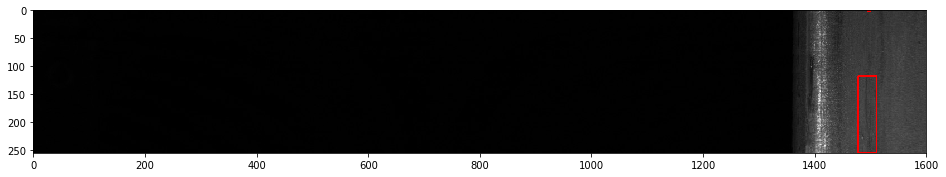

In [18]:
img = cv2.imread(os.path.join(train_images_folder, images_names_list[i]), 1)

for rect in boxes_by_mask(rle2mask(channels_data[images_names_list[i]][2], 256, 1600)):
    x, y, w, h = rect
    
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
plt.figure(figsize=(16, 10))
plt.imshow(img, 'gray')
plt.show()